In [1]:
import kit
from kit import penguin_color
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)
import palmerpenguins
pg = palmerpenguins.load_penguins().dropna()

## Conteos y proporciones

### Preludio: ¿Qué estadísticos describen el conjunto de datos?

Todas las variables

In [2]:
pg.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


Sólo las numéricas

In [3]:
pg.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


Sólo categóricas - 1

In [4]:
pg.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


Sólo categóricas - 2

In [5]:
(
    pg
    .astype(
        {
            'species': 'category',
            'island': 'category',
            'sex': 'category'
        }
    )
    .describe(include='category')
)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


### ¿Cómo visualizar los conteos?

Pandas

<Axes: xlabel='species'>

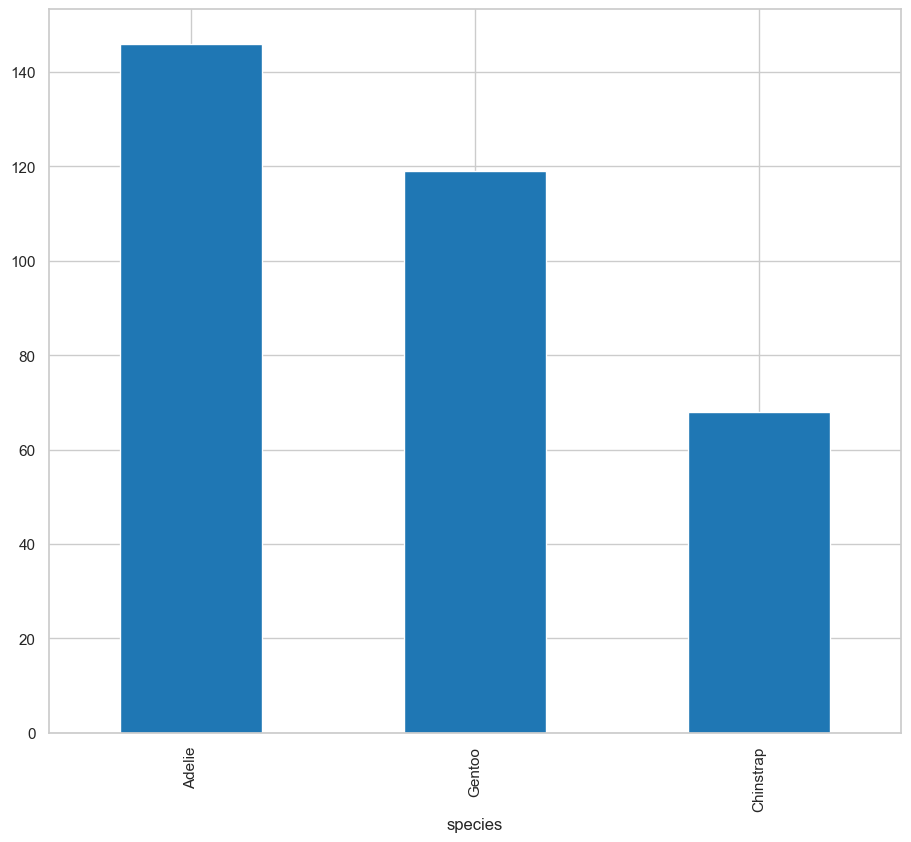

In [6]:
(
    pg
    .species
    .value_counts()
    .plot(
        kind='bar'
    )
)

Seaborn

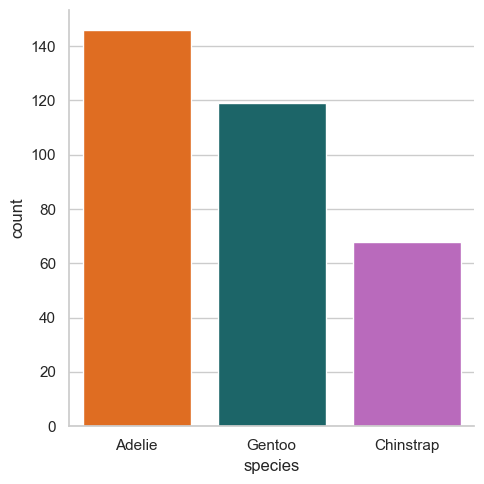

In [7]:
sns.catplot(
    data= pg,
    x= 'species',
    kind= 'count',
    palette= penguin_color,
    hue= 'species'
)

<Axes: xlabel='species', ylabel='count'>

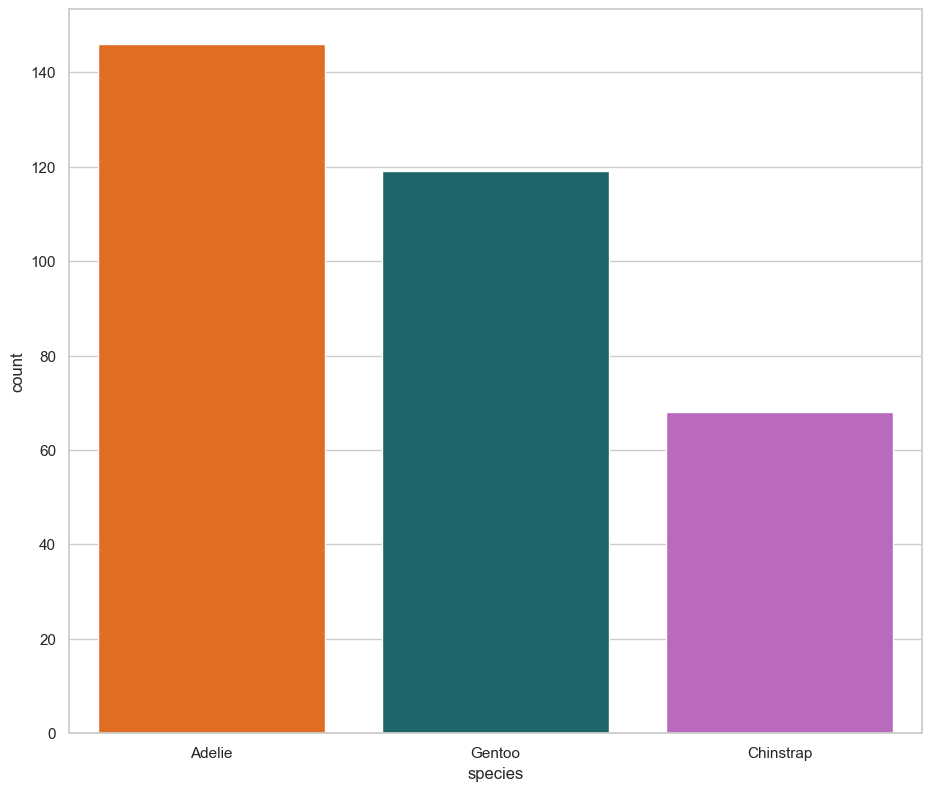

In [8]:
(
    pg
    .value_counts(
        'species',
        sort=True
    )
    .reset_index()
    .pipe(
        lambda df: (
            sns.barplot(
                data= df,
                x= 'species',
                y= 'count',
                palette= penguin_color,
                hue= 'species'
            )
        )
    )
)

¿Cómo visualizar las proporciones?

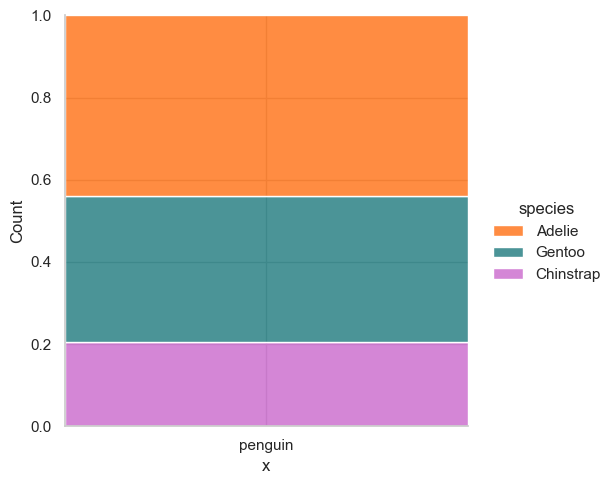

In [9]:
(
    pg
    .assign(
        x = 'penguin'
    )
    .pipe(
        lambda df: (
            sns.displot(
                data= df,
                x= 'x',
                hue= 'species',
                multiple= 'fill',
                palette= penguin_color
            )
        )
    )
)